In [416]:
import numpy as np
import pandas as pd


#task1

def meansqr_err(x0,x1):
    err=0
    for i in range(len(x0)):
        err += pow(np.linalg.norm(x1[i] - x0[i]),2)
    err/= len(x0)
    return err


data = pd.read_csv("linear_function_data.txt", delimiter= ' ')
data= np.array(data)

In [417]:
F1 = data1[:,1]
x1 = np.vstack([data1[:,0], np.zeros(len(x))]).T
A1 = np.linalg.lstsq(x1, F1, rcond=None)[0]


In [418]:
data2 = pd.read_csv("nonlinear_function_data.txt", delimiter= ' ')
data2 = np.array(data2)
F2 = data2[:,1]

x2 = np.vstack([data2[:,0], np.zeros(len(x))]).T
A2 = np.linalg.lstsq(x2, F2, rcond=None)[0]


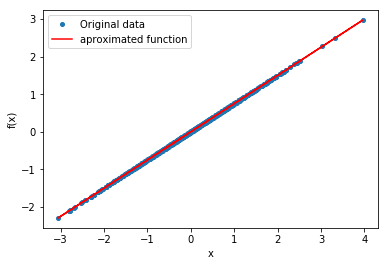

In [419]:
import matplotlib.pyplot as plt
plt.plot(x1[:,0], F1, 'o', label='Original data', markersize=4)
plt.plot(x1[:,0], A1[0]*x1[:,0], 'r', label='aproximated function')
plt.xlabel('x')
plt.ylabel('f(x)')
#plt.title('function for linear_function_data set')
plt.legend()
plt.savefig('lin.png')
plt.show()

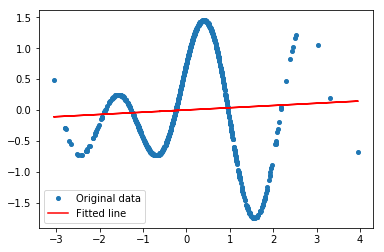

In [528]:
plt.plot(x2[:,0], F2, 'o', label='Original data', markersize=4)
plt.plot(x2[:,0], A2[0]*x2[:,0], 'r', label='Fitted line')
plt.legend()
plt.savefig("lin2.png")
plt.show()


(999, 2)
(999,)
999
0.3506183542232134
(2,)
(999, 2)


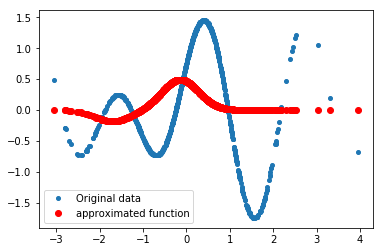

(999,)
999
0.3506183542232134
(5,)
(999, 5)


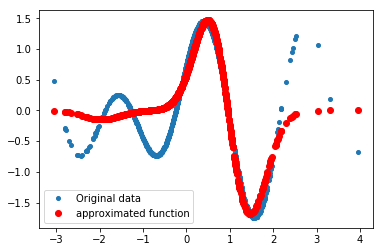

(999,)
999
0.3506183542232134
(10,)
(999, 10)


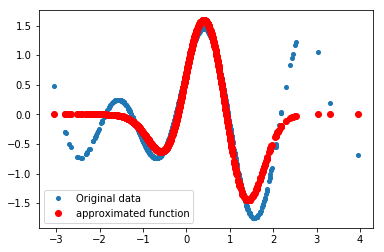

(999,)
999
0.3506183542232134
(20,)
(999, 20)


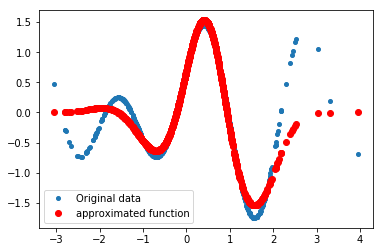

In [658]:
import random

print(x2.shape)

def nonlinear_radial(x,F,L):
    print(x.shape)
    print(len(x))
    D = np.zeros((len(x), len(x)))
    for i in range(len(x)):
        for j in range(len(x)):
            D[i, j] = np.linalg.norm(x[i] - x[j])

    epsilon = np.amax(D) * 0.05
    print(epsilon)
    xl = []
    for i in range(L):
        index = random.randrange(len(x))
        xl.append(x[index])
    #creating matrix phi(x)
    phix = np.zeros((len(x),L))
    for i in range(L):
        for j in range(len(x)):
            phix[j,i]=np.exp(-1* pow(np.linalg.norm(xl[i] - x[j]), 2) / epsilon)
    C = np.linalg.lstsq(phix, F, rcond=0.1)[0]
    print(C.shape)
    print(phix.shape)

#    ans = np.dot(phix,C.T)
    
    return C,phix




C,phix =nonlinear_radial(x2[:,0],F2,2)
plt.plot(x2[:,0], F2, 'o', label='Original data', markersize=4)
plt.plot(x2[:,0], np.dot(phix,C), 'ro', label='approximated function')
plt.legend()
plt.savefig('nonlin1_2.png')
plt.show()

C,phix =nonlinear_radial(x2[:,0],F2,5)
plt.plot(x2[:,0], F2, 'o', label='Original data', markersize=4)
plt.plot(x2[:,0], np.dot(phix,C), 'ro', label='approximated function')
plt.legend()
plt.savefig('nonlin1_5.png')
plt.show()

C,phix =nonlinear_radial(x2[:,0],F2,10)
plt.plot(x2[:,0], F2, 'o', label='Original data', markersize=4)
plt.plot(x2[:,0], np.dot(phix,C), 'ro', label='approximated function')
plt.legend()
plt.savefig('nonlin1_10.png')
plt.show()


C,phix =nonlinear_radial(x2[:,0],F2,20)
plt.plot(x2[:,0], F2, 'o', label='Original data', markersize=4)
plt.plot(x2[:,0], np.dot(phix,C), 'ro', label='approximated function')
plt.legend()
plt.savefig('nonlin1_50.png')
plt.show()



In [636]:
C,phix =nonlinear_radial(x2[:,0],F2,5)

x1_hat= np.dot(phix,C)
err = meansqr_err(x1_hat,F2)
print(err)

(999,)
999
0.3506183542232134
(5,)
(999, 5)
0.14963967482950755


In [612]:
#Task 2 
x0 = pd.read_csv("linear_vectorfield_data_x0.txt", header=None,delimiter= ' ')
x0=np.array(x0)
x1 = pd.read_csv("linear_vectorfield_data_x1.txt", header=None,delimiter= ' ')
x1=np.array(x1)
dt=0.1
V = (x1-x0)/dt
Ap = np.linalg.lstsq(x0,V,rcond=None)[0]
B = np.linalg.lstsq(x0, x1, rcond=None)[0]


In [613]:
from scipy.linalg import logm
A = logm(B)/dt
print(A)
print(Ap)

[[-0.49999998 -0.49999976]
 [ 0.2499998  -0.99999982]]
[[-0.49355245 -0.4638232 ]
 [ 0.23191153 -0.95737573]]


In [614]:
deltaT=0.1
x1_hat = np.dot(Ap,x0.T).T*deltaT + x0

In [615]:
err = 0 
for i in range(len(x0)):
    err += pow(np.linalg.norm(x1_hat[i] - V[i]),2)
err/= len(x0)
print(err)

1.9965723037214982


In [567]:
points=[]
initial=np.array([10,10])
points.append(initial)
print(np.dot(A,initial))
for i in range(1000):
    nextPoint = np.dot(A,initial.T)*0.1+initial
    initial = nextPoint
    points.append(nextPoint)
    


[-9.99999742 -7.50000027]


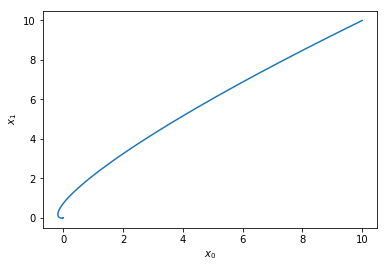

In [571]:
points = np.array(points)
plt.plot(points[:,0], points[:,1])
plt.xlabel('$x_0$')
plt.ylabel('$x_1$')
plt.savefig('traj.png')
plt.show()


In [ ]:
points

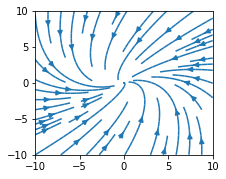

In [577]:
import matplotlib.gridspec as gridspec

w = 10



fig = plt.figure(figsize=(7, 9))
gs = gridspec.GridSpec(nrows=3, ncols=2, height_ratios=[1, 1, 1])


Y, X = np.mgrid[-w:w:100j, -w:w:100j]
U =  X*Ap[0][0] + Y*Ap[0][1]
V =  Ap[1][0]*X + Ap[1][1]*Y

ax0 = fig.add_subplot(gs[0, 0])
ax0.streamplot(X, Y, U, V, density=[0.5, 1])
plt.savefig("phase.png")

In [659]:
#Task3
x0 = pd.read_csv("nonlinear_vectorfield_data_x0.txt", delimiter= ' ')
x0 = np.array(x0)
x1 = pd.read_csv("nonlinear_vectorfield_data_x1.txt", delimiter= ' ')
x1 = np.array(x1)
dt= 0.1

V = (x1-x0)/dt
B = np.linalg.lstsq(x0, x1, rcond=None)[0]
Ap = np.linalg.lstsq(x0,V, rcond=None)[0]
A = logm(B)/deltaT
print(A)

[[-0.10069635  0.00903568]
 [-0.00252281 -0.44262429]]


In [660]:
deltaT = 0.1
x1_hat = np.dot(Ap,x0.T).T*deltaT + x0

In [661]:

err = meansqr_err(x1,x1_hat)
print(err)

0.03728395089450822


In [662]:
C,phix=nonlinear_radial(x0,V,50)

(1999, 2)
1999
0.6207036470222818
(50, 2)
(1999, 50)


In [663]:
x1_hat= np.dot(phix,C)*deltaT+x0
meansqr_err(x1,x1_hat)

0.016125279448930555

In [272]:
C.shape

(2, 4)

In [277]:
phix.shape

(1999, 4)

In [278]:
x0.shape


(1999, 2)

In [668]:
#for j in range(len(x0)):
e=0.1
deltaT=10
x1_hat = np.dot(phix,C)*deltaT + x0
deltaT=1000
x2_hat = np.dot(phix,C)*deltaT + x0
print(res)
#points = np.array(points)



[[ 1428.55268267  -924.19504839]
 [-2525.36633148  2061.37191082]
 [ -723.67047823  -987.42351867]
 ...
 [-2341.71394696  -310.6984986 ]
 [  -73.65289904   166.13720266]
 [  942.17482679   569.53725253]]


In [708]:
steady=[]
e=0.1
for j in range(len(x0)):
    points=[]
    initial=x0[j]
    points.append(initial)
    for i in range(1000):
        nextPoint = np.dot(np.dot(phix[j],C),initial.T)*0.1+initial
        initial = nextPoint
        points.append(nextPoint)
    if abs(points[-1][0]- points[-2][0])<e and abs(points[-1][0]- points[-2][0]) < e:
        steady.append(points[-1])
steady= np.array(steady)
print((steady))

[[ -2.17582049  -2.66557616]
 [ -0.82735004   0.6063546 ]
 [ -5.05736329   1.00562339]
 ...
 [ -3.51009125  -1.87134874]
 [-13.16929767  -5.92433371]
 [  0.27686981  -2.08674934]]


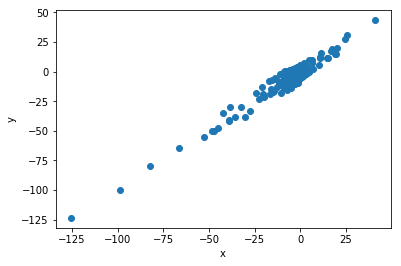

In [711]:
plt.plot(steady[:,0],steady[:,1],'o')
plt.xlabel('x')
plt.ylabel('y')
plt.savefig('steady.png')


In [710]:
print(len(steady))

838
